<h2>Keiland Pullen

DSC 478 - Programming Machine Learning

Homework #3</h2>

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor


In [4]:
import sklearn
sklearn.__version__

'0.24.2'

<h1>Problem 1.</h1>

<h2>a.) Load and preprocess data using numpy and pandas...</h2>

In [5]:
pwd

'C:\\Users\\Home'

In [6]:
cm_data = pd.read_csv('C:/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 7/homework/communities/communities.csv')

In [7]:
cm_data.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [8]:
cm_data.shape

(1994, 100)

In [9]:
cm_data.describe(include="all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [10]:
#remove row with ? character
cm_data = cm_data[cm_data.OtherPerCap != '?']

# cm_data

In [11]:
#pd.options.display.max_rows = 1999
missingVals = pd.DataFrame(cm_data.isnull().sum(0))
missingVals

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
...,...
PctSameState85,0
LandArea,0
PopDens,0
PctUsePubTrans,0


In [12]:
np.sum(np.array(pd.isnull(cm_data)),0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
cm_data.isna().any()

state                  False
communityname          False
population             False
householdsize          False
racepctblack           False
                       ...  
PctSameState85         False
LandArea               False
PopDens                False
PctUsePubTrans         False
ViolentCrimesPerPop    False
Length: 100, dtype: bool

In [14]:
# drop columns
y_var = np.array(cm_data.ViolentCrimesPerPop)
x_var = np.array(cm_data.drop(columns = ['state', 'communityname', 'ViolentCrimesPerPop'], axis=1, inplace=False))


In [15]:
x_var[:10]

array([[0.19, 0.33, 0.02, 0.9, 0.12, 0.17, 0.34, 0.47, 0.29, 0.32, 0.2,
        1.0, 0.37, 0.72, 0.34, 0.6, 0.29, 0.15, 0.43, 0.39, 0.4, 0.39,
        0.32, 0.27, 0.27, '0.36', 0.41, 0.08, 0.19, 0.1, 0.18, 0.48,
        0.27, 0.68, 0.23, 0.41, 0.68, 0.4, 0.75, 0.75, 0.35, 0.55, 0.59,
        0.61, 0.56, 0.74, 0.76, 0.04, 0.14, 0.03, 0.24, 0.27, 0.37, 0.39,
        0.07, 0.07, 0.08, 0.08, 0.89, 0.06, 0.14, 0.13, 0.33, 0.39, 0.28,
        0.55, 0.09, 0.51, 0.5, 0.21, 0.71, 0.52, 0.05, 0.26, 0.65, 0.14,
        0.06, 0.22, 0.19, 0.18, 0.36, 0.35, 0.38, 0.34, 0.38, 0.46, 0.25,
        0.04, 0.0, 0.12, 0.42, 0.5, 0.51, 0.64, 0.12, 0.26, 0.2],
       [0.0, 0.16, 0.12, 0.74, 0.45, 0.07, 0.26, 0.59, 0.35, 0.27, 0.02,
        1.0, 0.31, 0.72, 0.11, 0.45, 0.25, 0.29, 0.39, 0.29, 0.37, 0.38,
        0.33, 0.16, 0.3, '0.22', 0.35, 0.01, 0.24, 0.14, 0.24, 0.3, 0.27,
        0.73, 0.57, 0.15, 1.0, 0.63, 0.91, 1.0, 0.29, 0.43, 0.47, 0.6,
        0.39, 0.46, 0.53, 0.0, 0.24, 0.01, 0.52, 0.62, 0.64, 0.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 30)

<h2>b.) Perform <b>standard multiple linear regression</b> on data using... </h2>

In [17]:
# Add extra column filled with 1
x_var = np.array([np.concatenate((v,[1])) for v in x_var] )

In [18]:
x_var

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2, 1],
       [0.0, 0.16, 0.12, ..., 0.12, 0.45, 1],
       [0.0, 0.42, 0.49, ..., 0.21, 0.02, 1],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 1],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 1],
       [0.2, 0.78, 0.14, ..., 0.3, 0.05, 1]], dtype=object)

In [19]:
yMat = np.mat(y_var).T
yMat

xMat = np.mat(x_var, dtype='float') 
xMat

matrix([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 1.  ],
        [0.  , 0.16, 0.12, ..., 0.12, 0.45, 1.  ],
        [0.  , 0.42, 0.49, ..., 0.21, 0.02, 1.  ],
        ...,
        [0.16, 0.37, 0.25, ..., 0.32, 0.18, 1.  ],
        [0.08, 0.51, 0.06, ..., 0.38, 0.33, 1.  ],
        [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

In [20]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr, dtype='float') 
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [21]:
w = standRegres(x_var, y_var)

In [62]:
#coefficients

w

matrix([[ 1.58394687e-01],
        [-3.02481869e-02],
        [ 2.12229063e-01],
        [-3.97237986e-02],
        [-1.27930326e-02],
        [ 6.36900639e-02],
        [ 1.22194419e-01],
        [-2.23124229e-01],
        [-1.42627637e-01],
        [ 5.64658800e-02],
        [-2.60230134e-01],
        [ 4.65037847e-02],
        [-2.00798143e-01],
        [-2.08126761e-01],
        [ 4.70792802e-02],
        [-1.73534979e-01],
        [ 5.82291674e-02],
        [ 1.05064444e-02],
        [-9.22106451e-02],
        [ 2.72565616e-01],
        [ 9.72713359e-02],
        [-3.26302914e-01],
        [-2.89431388e-02],
        [-3.59461641e-02],
        [ 2.28885702e-02],
        [ 4.31169895e-02],
        [ 3.76737976e-02],
        [ 1.19950473e-01],
        [-1.83693623e-01],
        [-9.47657739e-02],
        [ 5.55240764e-02],
        [ 1.07281673e-01],
        [ 3.24692051e-03],
        [ 2.34646790e-01],
        [-3.87649999e-02],
        [-1.03179240e-02],
        [ 4.87331629e-01],
 

In [23]:
xMat = np.mat(x_var, dtype='float')
yMat = np.mat(y_var)

yHat = xMat*w

In [24]:
yHat.shape

(1993, 1)

In [25]:
yHat

matrix([[0.16737003],
        [0.28880518],
        [0.38345896],
        ...,
        [0.40086857],
        [0.16707892],
        [0.37302825]])

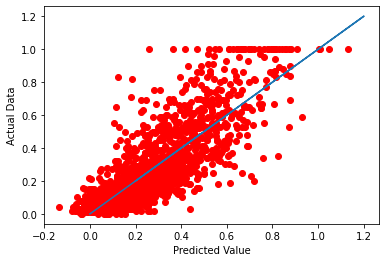

In [35]:
import matplotlib.pyplot as plt

plt.plot(yHat, y_var, 'ro')
plt.plot([0,1.2,.2],[0,1.2,0.2])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Data')
plt.show()

In [26]:
error = abs(yHat.T - y_var)
error

matrix([[0.03262997, 0.38119482, 0.04654104, ..., 0.17086857, 0.02292108,
         0.10697175]])

In [50]:
total_error = np.dot(error, error.T)

RMSE_train = np.sqrt(total_error/len(yHat))
RMSE_train

matrix([[0.12869119]])

In [51]:
from sklearn.model_selection import KFold

k = 10 
xval_err = 0
kf = KFold(k, random_state=None)

for train, test in kf.split(x_var):
    w = standRegres(x_var, y_var)
    xMat = np.mat(x_var, dtype='float')
    yMat = np.mat(y_var)
    yHat = xMat * w
    err  = abs(yHat.T - y_var)
    xval_err += (np.dot(err, err.T))
    
RMSE_10cv = np.sqrt(xval_err/len(yHat))

RMSE_10cv

matrix([[0.40695729]])

In [52]:
print ("RMSE Training = ", RMSE_train)
print ("RMSE 10-fold cv = ", RMSE_10cv)

RMSE Training =  [[0.12869119]]
RMSE 10-fold cv =  [[0.40695729]]


<h2>c. Feature Selection: use the scikit-learn regression model from ...

In [63]:
y_var = np.array(cm_data.ViolentCrimesPerPop)
x_var = np.array(cm_data.drop(columns = ['state', 'communityname', 'ViolentCrimesPerPop'], axis=1, inplace=False), dtype='float')

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 30)

In [93]:
from sklearn import feature_selection
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

l_reg = LinearRegression()

percentile = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = abs(cross_val_score(l_reg, X_train_fs, y_train, cv=5, scoring='neg_mean_absolute_error')) 
    print (i, scores.mean() )
    results = np.append(results, scores.mean())

1 0.1125471984466885
6 0.09920939846941854
11 0.09901393215517748
16 0.09871987644803452
21 0.0976108269137198
26 0.09601095374182664
31 0.09523611813849049
36 0.09494741335032368
41 0.09486596365083588
46 0.09527645316415298
51 0.09565549598306641
56 0.09601163845282214
61 0.09625867636993565
66 0.09684389359717302
71 0.09704919283152036
76 0.09686778776742833
81 0.09689341093047515
86 0.0959435146982929
91 0.0963963037196928
96 0.09558719611782585


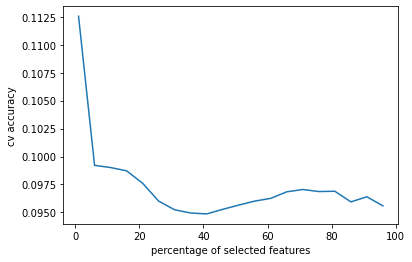

In [94]:
plt.plot(percentile, results)

plt.xlabel('percentage of selected features')
plt.ylabel('cv accuracy')
plt.show()

<h2>d. Next, using the original train-test split in part(a), perform <b>Ridge Regression</b> and <b>Lasso Regression</b>...

In [105]:
y = np.array(cm_data.ViolentCrimesPerPop)
x = np.array(cm_data.drop(columns = ['state', 'communityname', 'ViolentCrimesPerPop'], axis=1, inplace=False), dtype='float')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [159]:
ridge = Ridge()
lasso = Lasso()

ridge = Ridge(fit_intercept=True, alpha=0.5)

ridge.fit(x,y)

Ridge(alpha=0.5)

In [223]:
alpha = np.linspace(0.01, 97, 97)
alpha = np.array([float(e) for e in alpha])
print (alpha)

[1.00000000e-02 1.02031250e+00 2.03062500e+00 3.04093750e+00
 4.05125000e+00 5.06156250e+00 6.07187500e+00 7.08218750e+00
 8.09250000e+00 9.10281250e+00 1.01131250e+01 1.11234375e+01
 1.21337500e+01 1.31440625e+01 1.41543750e+01 1.51646875e+01
 1.61750000e+01 1.71853125e+01 1.81956250e+01 1.92059375e+01
 2.02162500e+01 2.12265625e+01 2.22368750e+01 2.32471875e+01
 2.42575000e+01 2.52678125e+01 2.62781250e+01 2.72884375e+01
 2.82987500e+01 2.93090625e+01 3.03193750e+01 3.13296875e+01
 3.23400000e+01 3.33503125e+01 3.43606250e+01 3.53709375e+01
 3.63812500e+01 3.73915625e+01 3.84018750e+01 3.94121875e+01
 4.04225000e+01 4.14328125e+01 4.24431250e+01 4.34534375e+01
 4.44637500e+01 4.54740625e+01 4.64843750e+01 4.74946875e+01
 4.85050000e+01 4.95153125e+01 5.05256250e+01 5.15359375e+01
 5.25462500e+01 5.35565625e+01 5.45668750e+01 5.55771875e+01
 5.65875000e+01 5.75978125e+01 5.86081250e+01 5.96184375e+01
 6.06287500e+01 6.16390625e+01 6.26493750e+01 6.36596875e+01
 6.46700000e+01 6.568031

In [239]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def get_params(x, y, name, values, K, model):
    
    y = np.array(x)
    x = np.array(y)
    
    trainScore = np.zeros(len(values))
    testScore = np.zeros(len(values))
    
    for i, value in enumerate(values):

        model.set_params(**{name:values})
        
        train_score = np.zeros(K)
        test_score = np.zeros(K)
        
        cv = KFold( K, shuffle=True, random_state=None)
        #print(cv)
        for train, test in cv.split(x):
            model.fit(x[train],y[train])
            p_train = model.predict(x[train])
            p_test  = model.predict(x[test])
            
            train_score = mean_absolute_error(y[train], p_train)
            test_score = mean_absolute_error(y[test], p_test)
            
        trainScore[i] = np.mean(train_score)
        testScore[i] = np.mean(test_score)

    plt.plot(values, trainScore, label='Train set', alpha=0.4, lw=2, c='r')
    plt.plot(values, testScore, label='Test set', alpha=0.4, lw=2, c='k')
    plt.legend(loc=7)
    plt.xlabel("alpha values")
    plt.ylabel("cv error")

    error_index = np.where(test_score == test_score.min())
    alpha_error = values[error_index]
    
    print("The error with alpha value is: ", alpha_error[0])

The error with alpha value is:  0.01


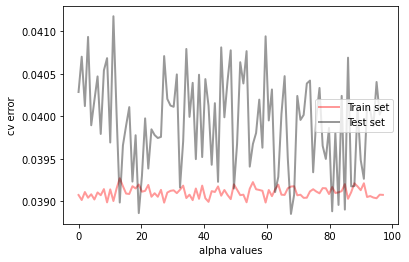

In [235]:
get_params(X_train, y_train, "alpha",alpha, 5, ridge)

In [241]:
ridge = Ridge(fit_intercept = True, alpha = 0.01)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_mean_sq_err = mean_squared_error(y_test, ridge_pred)
print ('Test data error for Ridge is:', ridge_mean_sq_err)


Test data error is: 0.02089560234061435


In [242]:
get_params(X_train, y_train, "alpha",alpha, 5, lasso)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [247]:
lasso = Lasso(fit_intercept = True, alpha = 0.01)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_mean_sq_err = mean_squared_error(y_test, lasso_pred)
print ('Test data error for Lasso is :', lasso_mean_sq_err)

Test data error for Lasso is : 0.027317333513284924


For this problem, there is an error in the function that I'm having trouble identifying. Since the alpha value returned for Ridge was 0.01, that value was used for Ridge and Lasso. 

Based on the values of the error, the Ridge model would be a better fit for this data.

<h2>e. Next perform regression using Stochastic Gradient Descent for regression.... </h2>

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [262]:
scale_data = StandardScaler()
scale_data.fit(x)
scale_x = scale_data.transform(x)

sgdreg = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 0.001, 1, 10)   
}

clf = GridSearchCV(sgdreg, parameters, verbose = 1, cv =5)

clf

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': array([0.0001]), 'penalty': ['l2', 'l1']},
             verbose=1)

In [264]:
clf.fit(X_train, y_train)

clf.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'alpha': 0.0001, 'penalty': 'l1'}

In [269]:
sgd_reg = SGDRegressor(penalty = 'l1', alpha = 0.0001)
sgd_reg.fit(X_train, y_train)
sgd_pred = sgdreg.predict(X_test)
sgd_mean_sq_err = mean_squared_error(y_test, sgd_pred)

print ('The test data Stochastic Gradient Descent error is: ',sgd_mean_sq_err)

The test data Stochastic Gradient Descent error is:  0.0234130969450492


In [272]:
l1_ratio = np.linspace(0.0001, .9999, 97)   
sgd_reg = SGDRegressor(penalty = 'elasticnet')

get_params(X_train, y_train, "l1_ratio", l1_ratio, 5, sgd_reg)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [274]:
sgd_reg = SGDRegressor(penalty = 'elasticnet', l1_ratio = 0.0001)

sgdreg.fit(X_train, y_train)
sgd_reg_pred = sgdreg.predict(X_test)
sgd_mean_sq_err = mean_squared_error(y_test, sgd_reg_pred)

print('The test data error with Stochastic Gradient Descent with elasticnet penalty is: ', sgd_mean_sq_err)

The test data error with Stochastic Gradient Descent with elasticnet penalty is:  0.022734356962743056


For this problem, there is a bug with the "get_params" function, so a I1_ratio of 0.0001 was used instead.

<h1>Problem 2</h1>

<h2>a. Create your own distance function that, ... uses Cosine similarity... </h2>

In [436]:
def cos_sim(a,b):
    cos_sim = dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    distance = 1 - cos_sim
    
    return distance

<h2>b. Load the data set</h2>

In [437]:
#classes.txt
x_class = pd.DataFrame(np.genfromtxt('C:/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 7/homework/newsgroups5/classes.txt', skip_header=1, dtype=int))
#x_class = pd.read_csv('C:/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 7/homework/newsgroups5/classes.txt', skiprows=0, header=0)
x_class = x_class.drop(x_class.columns[0], axis=1)
#x_class.head
x_class.shape

#xx_class.shape



(2500, 1)

In [438]:
x_class.head()

,1
0,0
1,1
2,1
3,1
4,2


In [691]:
#matrix.txt

x_matrix = pd.read_csv("C:/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 7/homework/newsgroups5/matrix.txt", header=None,sep=',')
# x_matrix.head(10)
x_matrix = np.array(x_matrix.T)

x_matrix.shape


(2500, 9328)

In [692]:
x_terms = (np.genfromtxt('C:/Users/Home/Desktop/DePaul/Winter - DSC - 478 - Programming Machine Learning/Week 7/homework/newsgroups5/terms.txt', dtype=str))

x_terms.shape

#xterms = x_terms.loc[:0]

#xterms.head()

(9328,)

In [693]:
x_train, x_test, y_train, y_test = train_test_split(x_matrix, x_class, test_size = 0.2, random_state = 23)

x_train.shape

(2000, 9328)

In [694]:
y_train.shape

(2000, 1)

In [695]:
doc_freq = np.array([(x_matrix!=0).sum(0)])
#print(doc_freq)

In [696]:
#x_matrix = x_matrix
NewsDocs = len(x_matrix)
#print(NewsDocs)


In [697]:
new_matrix = np.ones(np.shape(x_matrix), dtype=float)*NewsDocs
#new_matrix


In [698]:
IDF = np.log2(np.divide(new_matrix, doc_freq))
#print(IDF)

In [699]:
DT_tfidf = new_matrix * IDF

#DT_tfidf

<h2>c. Perform Kmeans clustering on the transformed training data from part b</h2>

In [720]:
from sklearn.cluster import KMeans 
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids 

def kMeans(dataSet, k, distMeas=cos_sim, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [746]:
train_dt_tfidf = np.array(x_train)

centroids, clusters = kMeans(train_dt_tfidf, 5)


In [702]:

for i in range(len(x_terms) ):
    print( x_terms[i])
    print("cluster 1 ", centroids[0][i])
    print("cluster 2 ", centroids[1][i])
    print("cluster 3 " , centroids[2][i])
    print("\n")


aa
cluster 1  4.145755843799153
cluster 2  0.0
cluster 3  3.8962002135002933


aargh
cluster 1  0.15607534474149942
cluster 2  0.009950248756218905
cluster 3  0.18544840610461155


aaron
cluster 1  28.042946535675444
cluster 2  0.0024875621890547263
cluster 3  23.32347867605699


aaronc
cluster 1  0.8212779204563336
cluster 2  0.0
cluster 3  0.7647832276596533


ab
cluster 1  4.390975561996658
cluster 2  0.0
cluster 3  3.824446174317321


abandon
cluster 1  0.058018822509157464
cluster 2  0.0
cluster 3  0.5885253223750421


abc
cluster 1  3.914710874766928
cluster 2  0.09203980099502487
cluster 3  3.415861874349704


abid
cluster 1  1.1046687727127957
cluster 2  0.0
cluster 3  1.9474847881369715


abil
cluster 1  1.7511195755932882
cluster 2  0.024875621890547265
cluster 3  0.1820476087049432


abl
cluster 1  3.1483927941075467
cluster 2  0.08208955223880597
cluster 3  1.709022381008928


abomin
cluster 1  1.4357194418901689
cluster 2  0.0
cluster 3  2.0776128989244906


abort
cluster 

In [714]:
def display_all(df, K, terms):
    centroids, clusters = kMeans(df, 10)
    
    for i in range(K):
        print("Cluster ", i)
        size = df[clusters[:,0]==i]
        print("Cluster size", size.shape[0] )
        print("Top ",terms," terms:")
        print("\n")
        


In [715]:
display_all(train_dt_tfidf, 5, 5)

Cluster  0
Cluster size 0
Top  5  terms:


Cluster  1
Cluster size 0
Top  5  terms:


Cluster  2
Cluster size 5
Top  5  terms:


Cluster  3
Cluster size 216
Top  5  terms:


Cluster  4
Cluster size 455
Top  5  terms:




<h2>d. Using the cluster assignments ...</h2>

In [748]:
clusters = clusters.T[0]
print(clusters)

[3. 4. 4. ... 4. 4. 4.]


In [754]:
x_train_2 = np.array(x_train.T)[0]
print(x_train_2)

[0 0 0 ... 0 0 0]


In [755]:
from sklearn.metrics.cluster import completeness_score, homogeneity_score

print (completeness_score(x_train_2, clusters))

0.0017585576230970436


In [756]:
print (homogeneity_score(x_train_2, clusters))

0.03143186171609685


<h2>e.</h2>

In [758]:
KMeans(y_test, 5)

C:\Users\Home\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass init=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


KMeans(init=5,
       n_clusters=      1
2290  3
203   3
2011  0
1432  3
909   0
...  ..
1343  3
1067  4
1693  2
1212  2
1822  3

[500 rows x 1 columns])